# Python Introduction

### This code introduces basics of Python and displays plots in Chapter 2 and 3.

# Part 1. Basics of Python
### Personally, arrays can be confusing, especially if you're used to languages like 'easy?' Fortran (according to the USM website, FORTRAN is considered easy and the language who doesn't have friend).
### Other aspects of Python might seem straightforward; you can often find answers by referring to the documentation.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os 
from matplotlib import cm
from scipy import integrate
from scipy import interpolate
%matplotlib inline 

In [6]:
x = np.ones(shape=(4,1))
print(x)
print(x.shape)
x = np.zeros(shape=(4,2))
print(x)
print(x.shape)
print(len(x))
x[0, 0]= 5
print(x)

[[1.]
 [1.]
 [1.]
 [1.]]
(4, 1)
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(4, 2)
4
[[5. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [21]:
a = np.linspace(1,100,100)
b = np.array([[1.0, 0.0], [0.0, 1.0]])
c = np.arange(1, 5.001, 1, dtype=int)
d = np.logspace(2.0, 6.0, num=5)
print(a)
print(b)
print(c)
print(d)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]
[[1. 0.]
 [0. 1.]]
[1 2 3 4 5]
[1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]


In [33]:
x = np.linspace(1,100,100)
print(x[0], x[1])
print(x[:4])
print(x[::5])

1.0 2.0
[1. 2. 3. 4.]
[ 1.  6. 11. 16. 21. 26. 31. 36. 41. 46. 51. 56. 61. 66. 71. 76. 81. 86.
 91. 96.]


# Part 2. Statistical Distribution

### In my Master's thesis, I employed two random fields: a Gaussian field and a lognormal field.
### These correspond to Figure 2.2 and Figure 2.4.

### Gaussian Distribution

### The Gaussian Distribution, often referred to as the Normal Distribution, is one of the most well-known and widely applicable probability distributions. It can be observed in various phenomena, such as gambling (though the Binomial Distribution may be more appropriate in some cases) and the heights of Dutch and British people.

### Why is it so widely applicable? The answer lies in the Central Limit Theorem, which states that as sample size increases, the distribution of the sample means tends to follow a Gaussian Distribution. This property makes it a fundamental concept in statistics and probability.

### The probability density function for the Gaussian Distribution is given by the formula:

$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \mathrm{exp}\left(-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right)
$$

### In this formula, $\sigma$ represents the variance, and $\mu$ denotes the mean of the distribution.

In [35]:
def gaussian_pdf(x, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

In [39]:
x = np.linspace(-2, 10, 1000) 

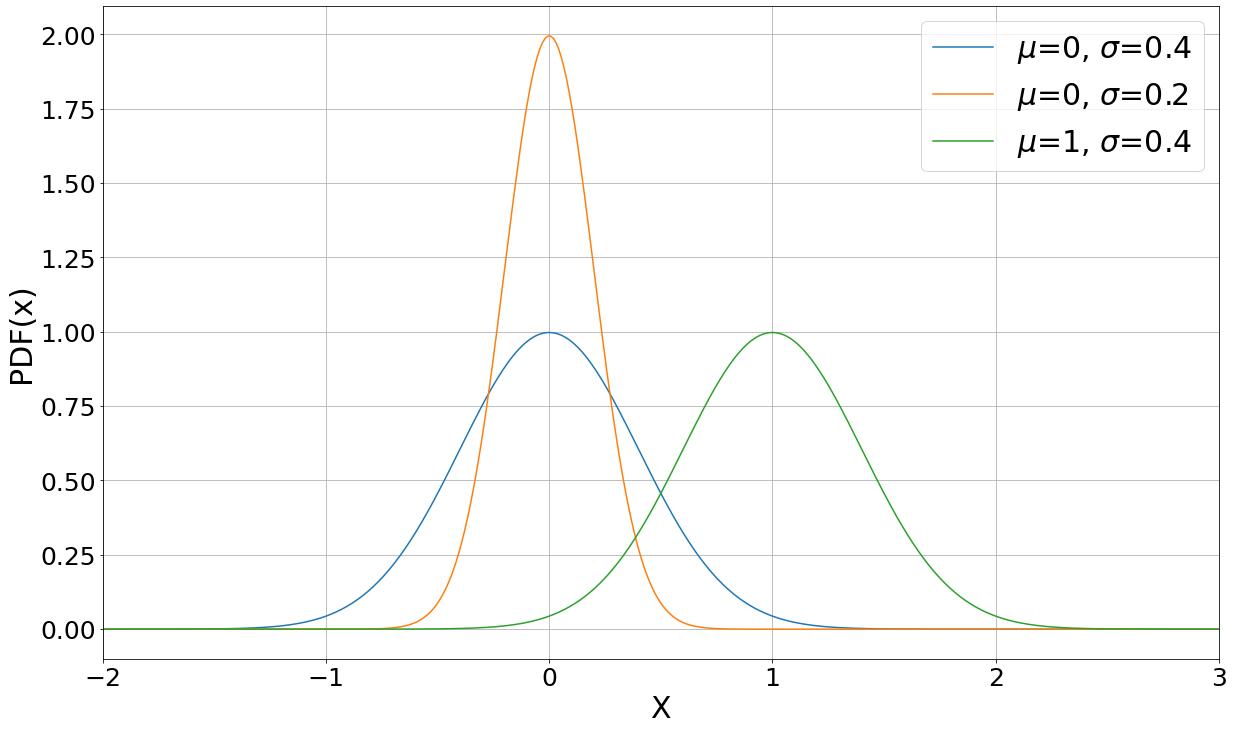

In [38]:
# Plot Gaussian distributions
plt.figure(figsize=(20,12))
plt.plot(x, gaussian_pdf(x, 0, 0.4),  label='$\mu$=0, $\sigma$=0.4')
plt.plot(x, gaussian_pdf(x, 0, 0.2),  label='$\mu$=0, $\sigma$=0.2')
plt.plot(x, gaussian_pdf(x, 1, 0.4),  label='$\mu$=1, $\sigma$=0.4')
plt.xlabel('X', fontsize=30)
plt.ylabel('PDF(x)', fontsize=30)
plt.xlim(-2,3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=30)
plt.grid()
#plt.savefig('Plot/Gaussian.jpg', bbox_inches='tight')
plt.show()

### So, like a 10-D mark, Herr Gauss is happy.

### My master's thesis deals with cosmic density fields that are not Gaussian due to the non-linear gravitational structure formation.
### Unlike the Gaussian distribution, the lognormal model (shifted lognormal distribution) exhibits non-zero odd-order moments.
### In general, the lognormal model is a good approximation for the late-time cosmic density field. However, for small scales, it may not be as suitable.
### The probability density function for the Lognormal Distribution is given by the formula:

$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}(x+\lambda)} \mathrm{exp}\left(-\frac{(\mathrm{log}(x+\lambda)-\mu)^2}{2\sigma^2}\right)
$$

### Here, $\lambda$ represents the lognormal shift parameter, while the other parameters are analogous to those found in the Gaussian distribution.

In [45]:
def shifted_lognormal_pdf(z, shift, variance, mu):
    return (1 / (variance * (x+shift) * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x+shift) - mu) ** 2) / (2 * variance ** 2))

/scratch-local/slurm-job-tmp-6001456/ipykernel_357/3534926226.py:2: RuntimeWarning: invalid value encountered in log
  return (1 / (variance * (x+shift) * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x+shift) - mu) ** 2) / (2 * variance ** 2))
/scratch-local/slurm-job-tmp-6001456/ipykernel_357/3534926226.py:2: RuntimeWarning: invalid value encountered in log
  return (1 / (variance * (x+shift) * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x+shift) - mu) ** 2) / (2 * variance ** 2))
/scratch-local/slurm-job-tmp-6001456/ipykernel_357/3534926226.py:2: RuntimeWarning: invalid value encountered in log
  return (1 / (variance * (x+shift) * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x+shift) - mu) ** 2) / (2 * variance ** 2))
/scratch-local/slurm-job-tmp-6001456/ipykernel_357/3534926226.py:2: RuntimeWarning: invalid value encountered in log
  return (1 / (variance * (x+shift) * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x+shift) - mu) ** 2) / (2 * variance ** 2))


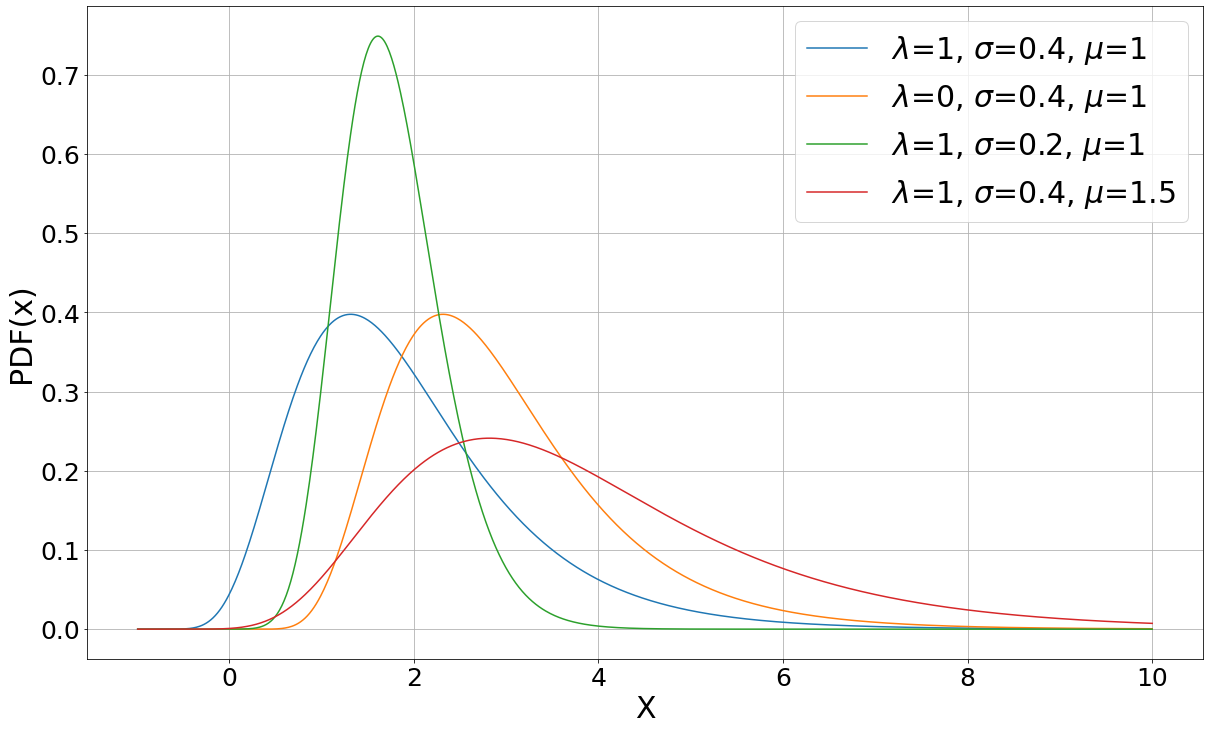

In [47]:
plt.figure(figsize=(20,12))
plt.plot(x, shifted_lognormal_pdf(x,1,0.4,1), label='$\lambda$=1, $\sigma$=0.4, $\mu$=1')
plt.plot(x, shifted_lognormal_pdf(x,0,0.4,1), label='$\lambda$=0, $\sigma$=0.4, $\mu$=1')
plt.plot(x, shifted_lognormal_pdf(x,1,0.2,1), label='$\lambda$=1, $\sigma$=0.2, $\mu$=1')
plt.plot(x, shifted_lognormal_pdf(x,1,0.4,1.5), label='$\lambda$=1, $\sigma$=0.4, $\mu$=1.5')
plt.xlabel('X', fontsize=30)
plt.ylabel('PDF(x)', fontsize=30)
#plt.title('Shifted Lognormal Distributions')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=30)
plt.grid()
# plt.savefig('Plot/Lognormal.jpg',bbox_inches='tight')
plt.show();

# Part 3. Hubble Parameter and Cosmological Distance
### It is corresponding to the figure 3.1, 3.2, 3.3.
### These correspond to Figure 3.1, Figure 3.2 and Figure 3.3.

### In $\Lambda$CDM cosmology, we start from the Friedmann metric (as clarified by Prof. Mukhanov, it's the Friedmann metric, not FRLW!).
### The line element is as follows:

$$
\mathrm{d}s^2 = a^2(\tau)\left[\mathrm{d}\tau - \left(\frac{\mathrm{d}r^2}{1-Kr^2} + r^2(\mathrm{d}\theta^2 + \sin^2\theta\mathrm{d}\phi^2)\right)\right]
$$

### This is expressed in comoving coordinates, and $K$ is a constant.
### According to the Friedmann metric, the universe can have one of three shapes:
(i) $K>0$ - a closed universe,
(ii) $K=0$ - a flat universe,
(iii) $K<0$ - an open universe.
### The plot illustrates a simplified 3D structure, representing a fictional Friedmann metric.

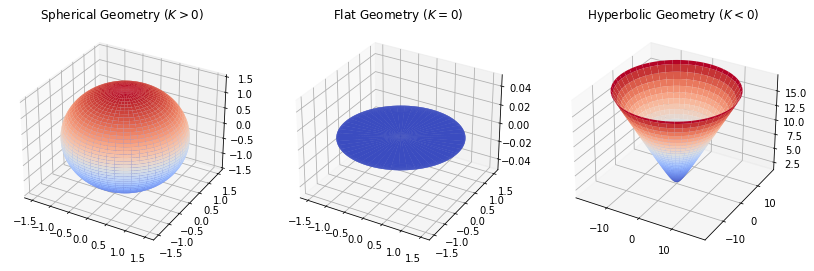

In [50]:
# Create a meshgrid for spherical coordinates
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Define radii for different geometries
radius_spherical = 1.5
radius_hyperbolic = 1.5
radius_flat = 1.5

# Convert spherical coordinates to Cartesian coordinates
x_spherical = radius_spherical * np.sin(phi) * np.cos(theta)
y_spherical = radius_spherical * np.sin(phi) * np.sin(theta)
z_spherical = radius_spherical * np.cos(phi)

x_hyperbolic = radius_hyperbolic * np.sinh(phi) * np.cos(theta)
y_hyperbolic = radius_hyperbolic * np.sinh(phi) * np.sin(theta)
z_hyperbolic = radius_hyperbolic * np.cosh(phi)

x_flat = radius_flat * np.sin(phi) * np.cos(theta)
y_flat = radius_flat * np.sin(phi) * np.sin(theta)
z_flat = np.zeros_like(x_flat)  

# Create 3D plots
fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x_spherical, y_spherical, z_spherical, cmap='coolwarm')
ax1.set_title('Spherical Geometry ($K>0$)')
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(x_flat, y_flat, z_flat, cmap='coolwarm')
ax2.set_title('Flat Geometry ($K=0$)')
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(x_hyperbolic, y_hyperbolic, z_hyperbolic, cmap='coolwarm')
ax3.set_title('Hyperbolic Geometry ($K<0$)')
#plt.tight_layout()
# plt.savefig('Plot/Geometry_Universe.png', bbox_inches='tight')
plt.show()

### Cheap Hubble parameter only depends on energy density of dark components.

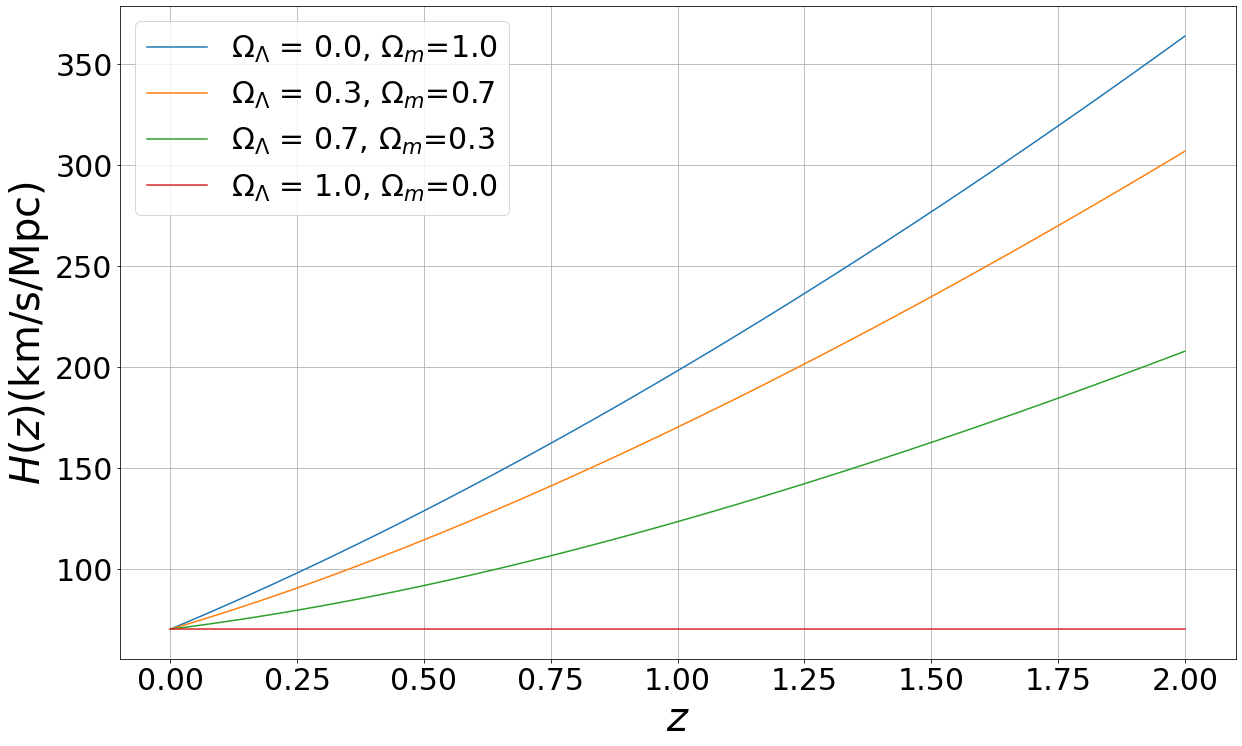

In [52]:
def Hubble(z, omegam, omegaDE):
    H = np.sqrt(omegam * (1. + z)**3 + omegaDE) * 70
    return H

# Define redshift range
z_range = np.linspace(0, 2.0, 100)

# Define huge Omega values
omega_values = [0.0, 0.3, 0.7, 1.0]

# Plot the Hubble parameter for different Omega values
plt.figure(figsize=(20,12))
for omegaDE in omega_values:
    omegam = 1.0-omegaDE  
    H_values = Hubble(z_range, omegam, omegaDE)
    plt.plot(z_range, H_values, label=f'$\Omega_\Lambda$ = {omegaDE:.1f}, $\Omega_m$={omegam:.1f}')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel(f'$z$',fontsize=40)
plt.ylabel(f'$H(z)$(km/s/Mpc)',fontsize=40)
#plt.title('Hubble Parameter for Different Scenario in Flat Universe',fontsize=24)
plt.legend(fontsize=30)
plt.grid()
#plt.savefig('Plot/Hubble_Paramer.jpg', bbox_inches='tight')
#plt.yscale('log')  
plt.show();

### Also, adding the radiation components.

In [53]:
def Hubble(z, omegam, omegar,omegaDE):
    H=np.sqrt(omegam*(1.+z)**3+omegaDE+omegar*(1.+z)**4)*100
    return H

In [54]:
def comoving_distance(z, omegam, omegar,omegaDE):
    H_inv=lambda x: c/Hubble(x, omegam, omegar,omegaDE)
    return integrate.quad(H_inv, 0, z)[0]

def angulardiameter_distance(z, omegam, omegar,omegaDE):
    return 1./(1.+z)*comoving_distance(z, omegam, omegar,omegaDE)

def luminosity_distance(z, omegam, omegar,omegaDE):
    return (1.+z)*comoving_distance(z, omegam, omegar,omegaDE)

In [55]:
#constants
c=3.0e5
zeq=3400.
omegam=0.14
omegaDE=0.31
omegar=omegam/(1+zeq)

In [57]:
z=np.linspace(0.,5.,1000)
dc=np.zeros(len(z))
da=np.zeros(len(z))
dl=np.zeros(len(z))
for i in range(len(z)):
    dc[i]=comoving_distance(z[i], omegam, omegar,omegaDE)
    da[i]=angulardiameter_distance(z[i], omegam, omegar,omegaDE)
    dl[i]=luminosity_distance(z[i], omegam, omegar,omegaDE)
print(len(z))
print(len(dc))

1000
1000


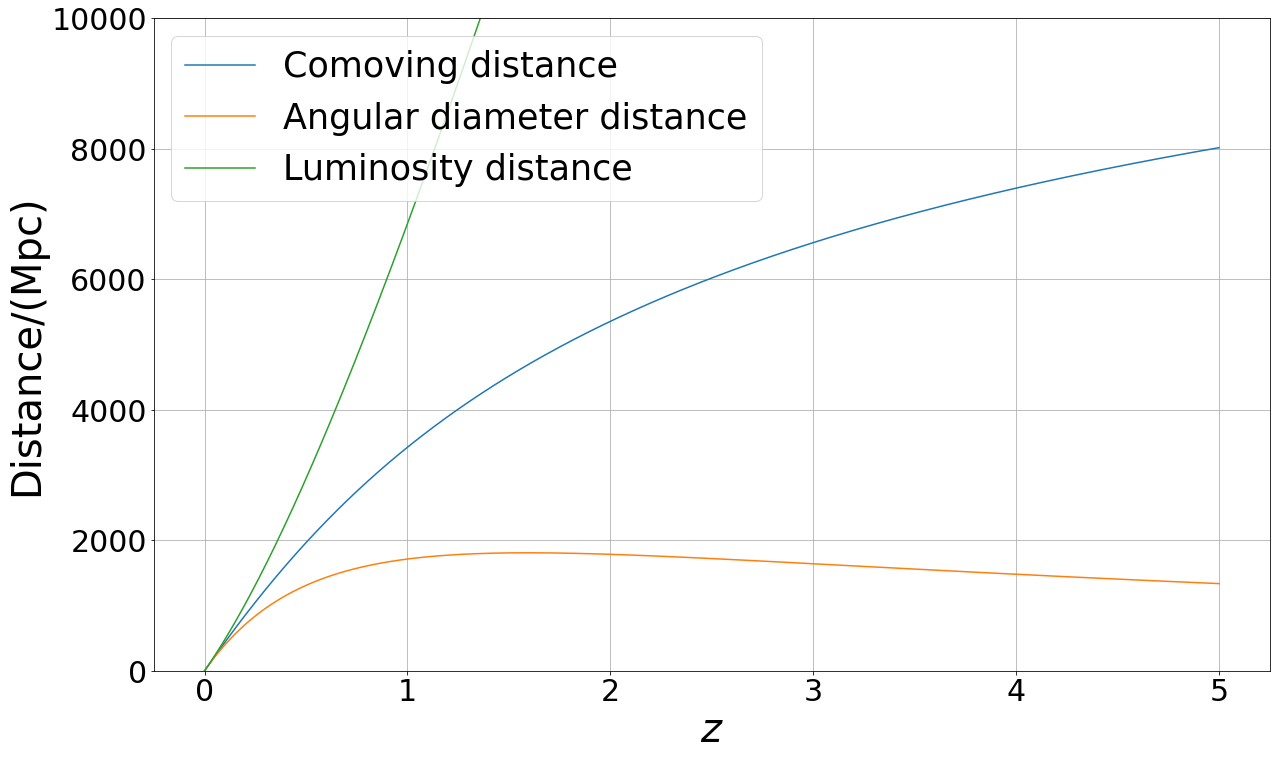

In [58]:
plt.figure(figsize=(20,12))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.plot(z, dc,label='Comoving distance')
plt.plot(z, da,label='Angular diameter distance')
plt.plot(z, dl, label='Luminosity distance')
plt.ylim(0,10000)
plt.xlabel(r"$z$", fontsize=40)
plt.ylabel("Distance/(Mpc)", fontsize=40)
plt.legend(fontsize=35)
plt.grid()
#plt.savefig('Plot/Cosmological_distances.jpg', bbox_inches='tight')
#plt.yscale('log')  
plt.show();